Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2 - Neural Networks
<hr> | <hr>
<u>**CPE019 Assignment (2nd Sem, A.Y. 2023-2024)** | **Hands-on Activity 6.1**
**Name** | Cortez, Angelica
**Section** | CPE32S3
**Schedule**: |Wednesday - 10:30am - 1:30pm
**Date Performed**: |03/30/2024
**Date Submitted**: |04/02/2024
**Instructor**: | Engr.Roman Richard
<hr>

# Activity 1.1 : Neural Networks

#### Objective(s):

This activity aims to demonstrate the concepts of neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use activation function in neural networks
* Demonstrate how to apply feedforward and backpropagation in neural networks


#### Resources:
* Jupyter Notebook


#### Procedure:

Import the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Define and plot an activation function

### Sigmoid function:

$$
\sigma = \frac{1}{1 + e^{-x}}
$$

$\sigma$ ranges from (0, 1). When the input $x$ is negative, $\sigma$ is close to 0. When $x$ is positive, $\sigma$ is close to 1. At $x=0$, $\sigma=0.5$

In [ ]:
## create a sigmoid function
def sigmoid(x):
    """Sigmoid function"""
    return 1.0 / (1.0 + np.exp(-x))

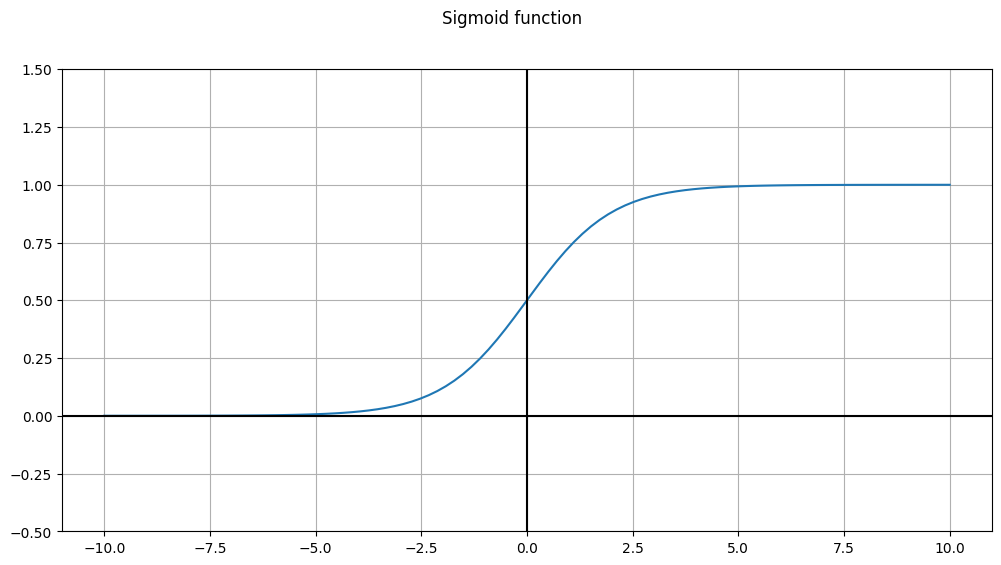

In [ ]:
# Plot the sigmoid function
vals = np.linspace(-10, 10, num=100, dtype=np.float32)
activation = sigmoid(vals)
fig = plt.figure(figsize=(12,6))
fig.suptitle('Sigmoid function')
plt.plot(vals, activation)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-0.5, 1.5]);   #sets the  li mit  of  y-ax is ,  shows  th e  rel ev a nt ra  ng e  of  sig moid  fu ncti o n

Choose any activation function and create a method to define that function.

In [ ]:
#Rectified Linear Units (ReLu) function
# A(x) = max(0, x)

def relu(x):
  return np.maximum(0, x)

In [ ]:
#Tangent Hyperbolic (tanh) function
#tanh(x) = (exp(x) - exp(-x)) / (exp(x) + exp(-x))

def tanh(x):
  return np.tanh(x)

Softmax Function

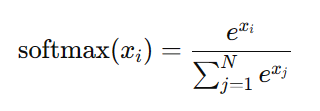

In [ ]:
def softmax(x):
    score = np.exp(x - np.max(x))
    return score / np.sum(score)

***ANALYSIS:***

In analyzing these activation functions, ReLU stands out for its simplicity and effectiveness in combating the vanishing gradient problem, commonly encountered in deep learning. With a straightforward formula of returning the maximum of 0 and input, ReLU efficiently handles non-linearity while maintaining computational efficiency. Tanh, on the other hand, provides a smoother transition between its extremes, ranging from -1 to 1, making it suitable for certain contexts like recurrent neural networks. Finally, the softmax, often utilized in the output layer of multi-class classification models, normalizes the input values into a probability distribution, facilitating interpretation of model outputs.

Plot the activation function

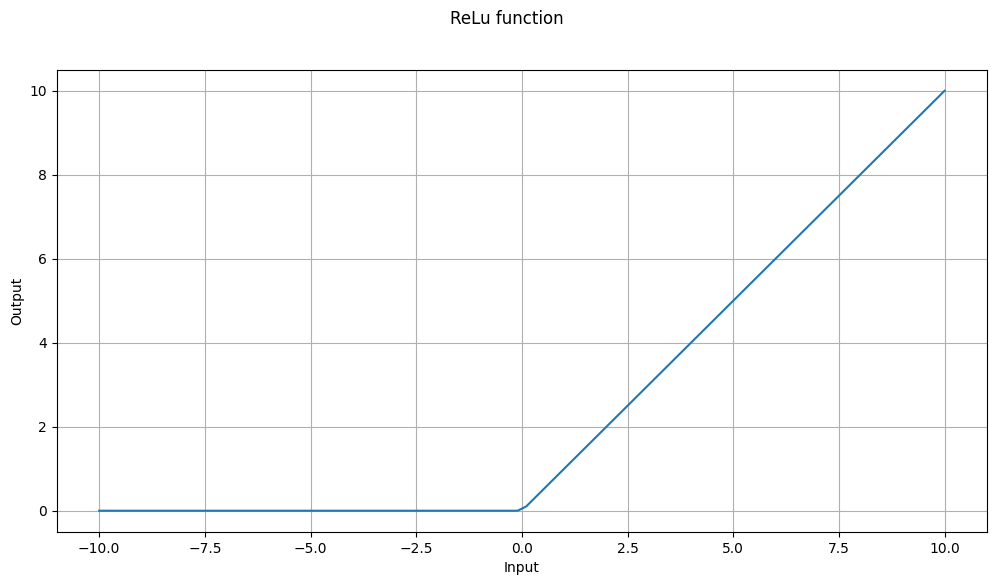

In [ ]:
#Plot the ReLu Function
x_ReLu = np.linspace(-10, 10, num = 100)
activation = relu(x_ReLu)
fig = plt.figure(figsize=(12,6))
fig.suptitle('ReLu function')
plt.plot(x_ReLu, activation)
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.show()

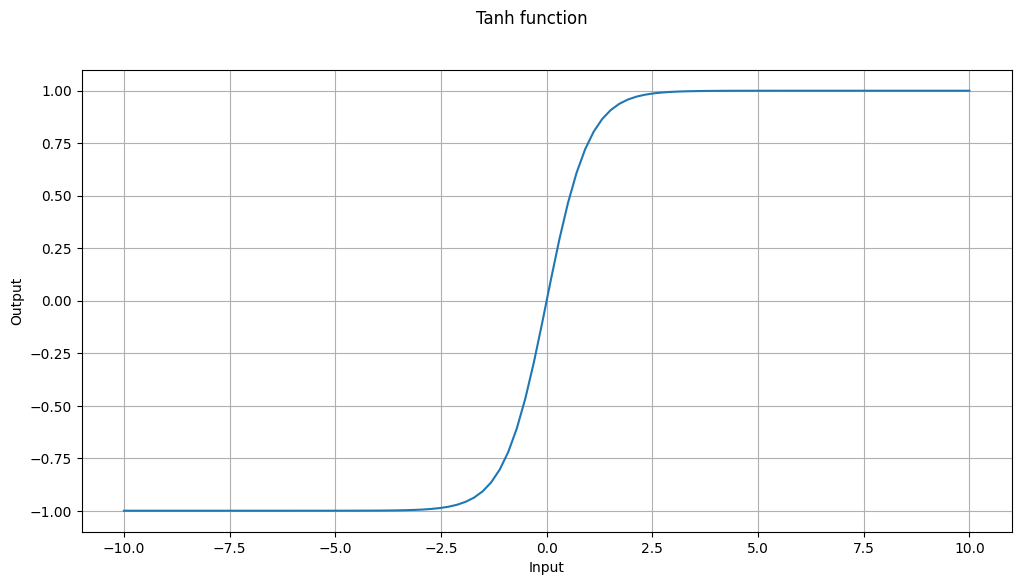

In [ ]:
# Plot the tanh function
x_tanh = np.linspace(-10, 10, num = 100)
activation = tanh(x_tanh)
fig = plt.figure(figsize=(12,6))
fig.suptitle('Tanh function')
plt.plot(x_tanh, activation)
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.show()

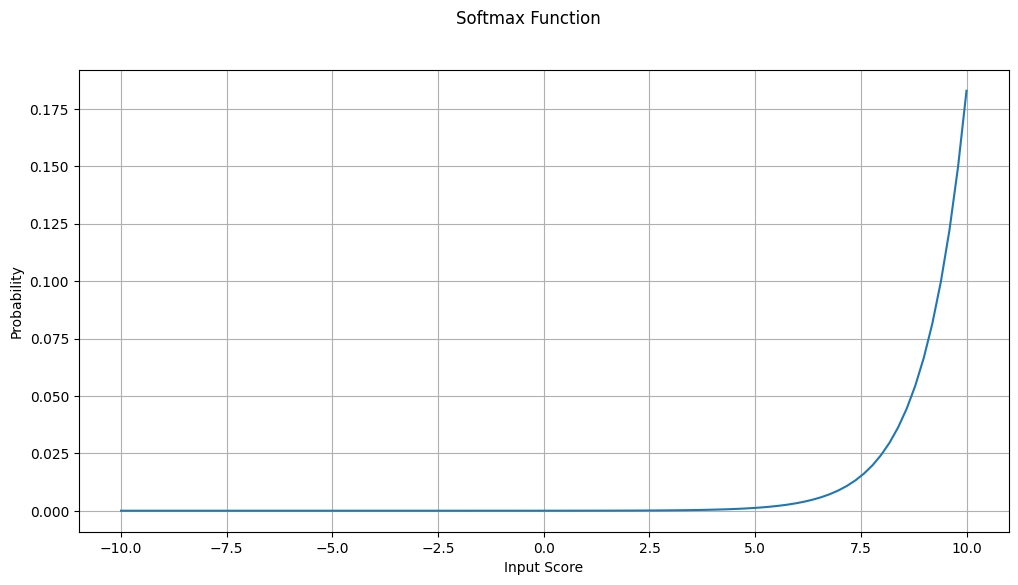

In [ ]:
# Plot the softmax function
x_softmax = np.linspace(-10, 10, num = 100)
softmax_values = softmax(x_softmax)
fig = plt.figure(figsize=(12,6))
fig.suptitle('Softmax Function')
plt.plot(x_softmax, softmax_values)
plt.xlabel('Input Score')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

***ANALYSIS:***
In analyzing the plotted activation functions, it's evident that each serves a distinct purpose in neural network architectures. ReLU, with its straightforward rectified linear behavior, effectively deals with the vanishing gradient problem and enhances convergence during training. Tanh, characterized by its S-shaped curve, provides a smooth transition and maps inputs to outputs in the range [-1, 1], facilitating gradient propagation and convergence. Softmax, graph for multi-class classification tasks, outputs probabilities for each class, aiding in decision-making

### Neurons as boolean logic gates



### OR Gate

<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

A neuron that uses the sigmoid activation function outputs a value between (0, 1). This naturally leads us to think about boolean values.



By limiting the inputs of $x_1$ and $x_2$ to be in $\left\{0, 1\right\}$, we can simulate the effect of logic gates with our neuron. The goal is to find the weights , such that it returns an output close to 0 or 1 depending on the inputs.

What numbers for the weights would we need to fill in for this gate to output OR logic? Observe from the plot above that $\sigma(z)$ is close to 0 when $z$ is largely negative (around -10 or less), and is close to 1 when $z$ is largely positive (around +10 or greater).

$$
z = w_1 x_1 + w_2 x_2 + b
$$

Let's think this through:

* When $x_1$ and $x_2$ are both 0, the only value affecting $z$ is $b$. Because we want the result for (0, 0) to be close to zero, $b$ should be negative (at least -10)
* If either $x_1$ or $x_2$ is 1, we want the output to be close to 1. That means the weights associated with $x_1$ and $x_2$ should be enough to offset $b$ to the point of causing $z$ to be at least 10.
* Let's give $b$ a value of -10. How big do we need $w_1$ and $w_2$ to be?
    * At least +20
* So let's try out $w_1=20$, $w_2=20$, and $b=-10$!

In [ ]:
def logic_gate(w1, w2, b):
    # Helper to create logic gate functions
    # Plug in values for weight_a, weight_b, and bias
    return lambda x1, x2: sigmoid(w1 * x1 + w2 * x2 + b)

def test(gate):
    # Helper function to test out our weight functions.
    for a, b in (0, 0), (0, 1), (1, 0), (1, 1):
        print("{}, {}: {}".format(a, b, np.round(gate(a, b))))

***ANALYSIS:***
With inputs restricted to {0,1}, this configuration ensures that the neuron outputs values close to 0 for inputs (0,0) and close to 1 for any other combination (1,0), (0,1), or (1,1), aligning with OR logic.

In [ ]:
or_gate = logic_gate(20, 20, -10)
test(or_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

Try finding the appropriate weight values for each truth table.

### AND Gate

<table>

<tr>
<th colspan="3">AND gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>


Try to figure out what values for the neurons would make this function as an AND gate.

In [ ]:
# Fill in the w1, w2, and b parameters such that the truth table matches
w1 = 65
w2 = 65
b = -78
AND_gate = logic_gate(w1, w2, b)

test(AND_gate)

0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 1.0


Do the same for the NOR gate and the NAND gate.

In [ ]:
# NOR GATE
w1 = -65
w2 = -78
b = 65
NOR_gate = logic_gate(w1, w2, b)

test(NOR_gate)

0, 0: 1.0
0, 1: 0.0
1, 0: 0.0
1, 1: 0.0


In [ ]:
# NAND GATE
w1 = -65
w2 = -65
b = 78
NAND_gate = logic_gate(w1, w2, b)

test(NAND_gate)

0, 0: 1.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


***ANALYSIS:***

For an AND gate, it ensures that the neuron outputs values close to 0 unless both inputs are 1, aligning with AND logic. Conversely, for a NOR gate, it result in an output close to 1 only when both inputs are 0, consistent with NOR logic. Lastly, configuring a NAND gate, where the neuron outputs values close to 1 unless both inputs are 1, mirroring NAND logic. These parameter adjustments demonstrate the adaptability of neurons in neural networks to simulate diverse boolean operations by manipulating weights and biases accordingly.

## Limitation of single neuron

 Here's the truth table for XOR:

### XOR (Exclusive Or) Gate

<table>

<tr>
<th colspan="3">XOR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

Now the question is, can you create a set of weights such that a single neuron can output this property?

It turns out that you cannot. Single neurons can't correlate inputs, so it's just confused. So individual neurons are out. Can we still use neurons to somehow form an XOR gate?


In [ ]:
# Make sure you have or_gate, nand_gate, and and_gate working from above!
def xor_gate(a, b):
    c = or_gate(a, b)
    d = NAND_gate(a, b)
    return AND_gate(c, d)
test(xor_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


***ANALYSIS:***

It's evident that it cannot correlate inputs to output complex behaviors like the XOR gate. However, by combining simpler logic gates like OR, NAND, and AND, we can construct an XOR gate using multiple neurons. This approach leverages the collective functionality of these gates to achieve the XOR behavior, highlighting the power of neural network architectures in solving more intricate problems through composition.

## Feedforward Networks

The feed-forward computation of a neural network can be thought of as matrix calculations and activation functions.  We will do some actual computations with matrices to see this in action.

## Exercise
Provided below are the following:

- Three weight matrices `W_1`, `W_2` and `W_3` representing the weights in each layer.  The convention for these matrices is that each $W_{i,j}$ gives the weight from neuron $i$ in the previous (left) layer to neuron $j$ in the next (right) layer.  
- A vector `x_in` representing a single input and a matrix `x_mat_in` representing 7 different inputs.
- Two functions: `soft_max_vec` and `soft_max_mat` which apply the soft_max function to a single vector, and row-wise to a matrix.

The goals for this exercise are:
1. For input `x_in` calculate the inputs and outputs to each layer (assuming sigmoid activations for the middle two layers and soft_max output for the final layer.
2. Write a function that does the entire neural network calculation for a single input
3. Write a function that does the entire neural network calculation for a matrix of inputs, where each row is a single input.
4. Test your functions on `x_in` and `x_mat_in`.

This illustrates what happens in a NN during one single forward pass. Roughly speaking, after this forward pass, it remains to compare the output of the network to the known truth values, compute the gradient of the loss function and adjust the weight matrices `W_1`, `W_2` and `W_3` accordingly, and iterate. Hopefully this process will result in better weight matrices and our loss will be smaller afterwards

In [ ]:
W_1 = np.array([[2,-1,1,4],[-1,2,-3,1],[3,-2,-1,5]])
W_2 = np.array([[3,1,-2,1],[-2,4,1,-4],[-1,-3,2,-5],[3,1,1,1]])
W_3 = np.array([[-1,3,-2],[1,-1,-3],[3,-2,2],[1,2,1]])
x_in = np.array([.5,.8,.2])
x_mat_in = np.array([[.5,.8,.2],[.1,.9,.6],[.2,.2,.3],[.6,.1,.9],[.5,.5,.4],[.9,.1,.9],[.1,.8,.7]])

def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))

print('the matrix W_1\n')
print(W_1)
print('-'*30)
print('vector input x_in\n')
print(x_in)
print ('-'*30)
print('matrix input x_mat_in -- starts with the vector `x_in`\n')
print(x_mat_in)

the matrix W_1

[[ 2 -1  1  4]
 [-1  2 -3  1]
 [ 3 -2 -1  5]]
------------------------------
vector input x_in

[0.5 0.8 0.2]
------------------------------
matrix input x_mat_in -- starts with the vector `x_in`

[[0.5 0.8 0.2]
 [0.1 0.9 0.6]
 [0.2 0.2 0.3]
 [0.6 0.1 0.9]
 [0.5 0.5 0.4]
 [0.9 0.1 0.9]
 [0.1 0.8 0.7]]


***ANALYSIS:***

By analyzing the provided information, the process of feedforward computation in a neural network involves matrix operations and activation functions. With the given weight matrices W1, W2, and W3, alongside input vectors X_in and X_mat_in. Based on the following code, it conducted calculations to determine the inputs and outputs for each layer, assuming sigmoid activations for intermediate layers and softmax for the final layer. By implementing functions for single input and matrix input calculations, It tested them on X_in and X_mat_in, illustrating the forward pass in a neural network. This foundational step sets the stage for subsequent processes like error computation, gradient descent, and weight adjustments to refine the network's performance iteratively.

## Exercise
1. Get the product of array x_in and W_1 (z2)
2. Apply sigmoid function to z2 that results to a2
3. Get the product of a2 and z2 (z3)
4. Apply sigmoid function to z3 that results to a3
5. Get the product of a3 and z3 that results to z4


In [ ]:
# Get the product of array x_in and W_1 (z2)
z2 = np.dot(x_in, W_1)

print('z2:', z2)

z2: [ 0.8  0.7 -2.1  3.8]


In [ ]:
# Apply sigmoid function to z2 that results to a2
a2 = sigmoid(z2)
print('a2:', a2)

a2: [0.68997448 0.66818777 0.10909682 0.97811873]


In [ ]:
# Get the product of a2 and z2 (z3)
z3 = np.dot(a2, z2)

print('z3:', z3)

z3: 4.507458871351723


In [ ]:
# Apply sigmoid function to z3 that results to a3
a3 = sigmoid(z3)
print('a3:', a3)

a3: 0.9890938122523221


In [ ]:
# Get the product of a3 and z3 that results to z4
z4 = np.dot(a3, z3)
print('z4:', z4)

z4: 4.458299678635824


In [ ]:
def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))


7. Apply soft_max_vec function to z4 that results to y_out

In [ ]:
y_out = soft_max_vec(z4)
print('y_out:', y_out)

y_out: 1.0


In [ ]:
## A one-line function to do the entire neural net computation

def nn_comp_vec(x):
    return soft_max_vec(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

def nn_comp_mat(x):
    return soft_max_mat(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

In [ ]:
nn_comp_vec(x_in)

array([0.72780576, 0.26927918, 0.00291506])

In [ ]:
nn_comp_mat(x_mat_in)

array([[0.72780576, 0.26927918, 0.00291506],
       [0.62054212, 0.37682531, 0.00263257],
       [0.69267581, 0.30361576, 0.00370844],
       [0.36618794, 0.63016955, 0.00364252],
       [0.57199769, 0.4251982 , 0.00280411],
       [0.38373781, 0.61163804, 0.00462415],
       [0.52510443, 0.4725011 , 0.00239447]])

***ANALYSIS:***

Analyzing the provided computations, it's evident that the feedforward process involves matrix multiplications and activation functions to propagate inputs through the neural network. By sequentially applying the sigmoid function to the dot product of inputs and weight matrices, intermediate activations a2 and a3 are obtained, leading to the final output y_out after applying the softmax function. The concise one-line functions for both single input and matrix input computations efficiently encapsulate the entire neural network computation,showcasing the streamlined nature of feedforward processes in neural networks.

## Backpropagation
The backpropagation in this part will be used to train a multi-layer perceptron (with a single hidden layer).  Different patterns will be used and the demonstration on how the weights will converge. The different parameters such as learning rate, number of iterations, and number of data points will be demonstrated

In [ ]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?


shape of x_mat_full is (500, 3)
shape of y is (500,)


<ipython-input-96-1d370139ed12>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
<ipython-input-96-1d370139ed12>:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


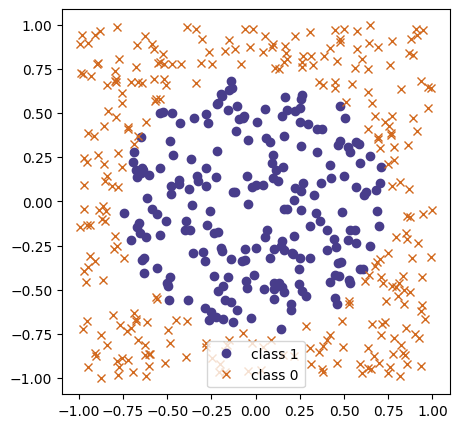

In [ ]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
#y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

shape of x_mat_full is (500, 3)
shape of y is (500,)


<ipython-input-97-fcfc386b3b6a>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
<ipython-input-97-fcfc386b3b6a>:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


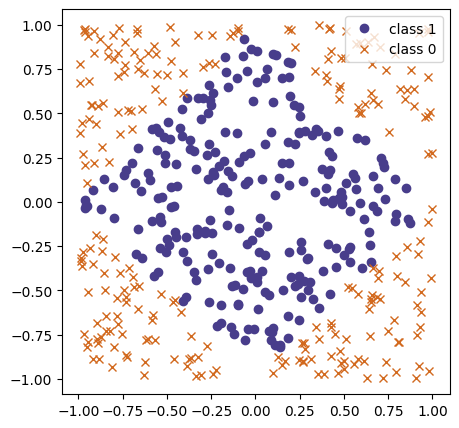

In [ ]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
#y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

shape of x_mat_full is (500, 3)
shape of y is (500,)


<ipython-input-98-fde13cd11d55>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
<ipython-input-98-fde13cd11d55>:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


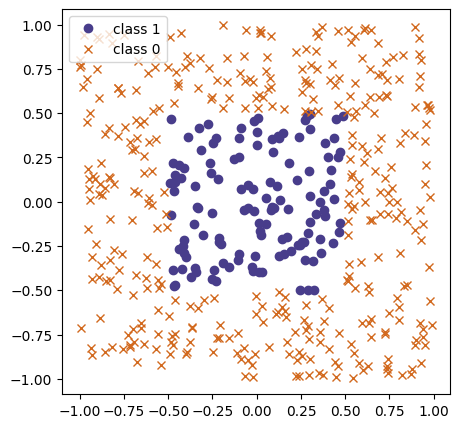

In [ ]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
#y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
#y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

shape of x_mat_full is (500, 3)
shape of y is (500,)


<ipython-input-99-1a3e8fcb345d>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
<ipython-input-99-1a3e8fcb345d>:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


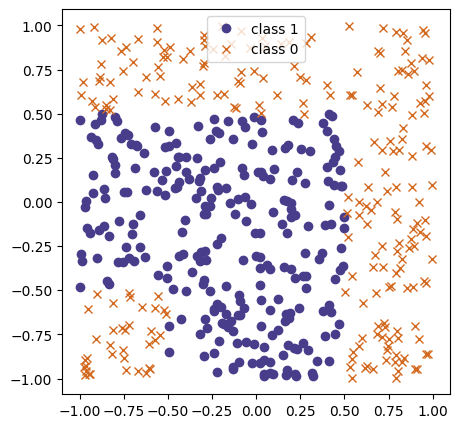

In [ ]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
#y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

shape of x_mat_full is (500, 3)
shape of y is (500,)


<ipython-input-100-9b0d66223a72>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
<ipython-input-100-9b0d66223a72>:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


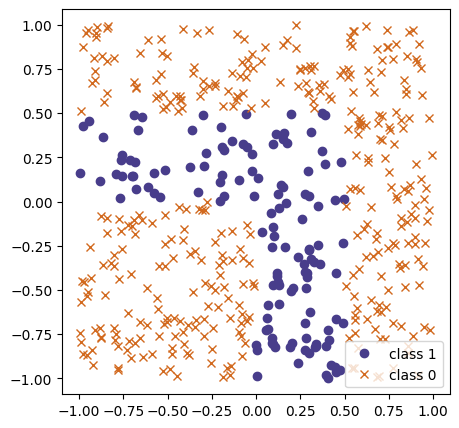

In [ ]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
#y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

shape of x_mat_full is (500, 3)
shape of y is (500,)


<ipython-input-101-d0d7422636ec>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
<ipython-input-101-d0d7422636ec>:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


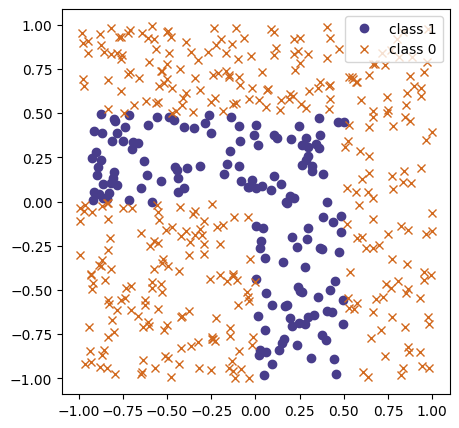

In [ ]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

***ANALYSIS:***

By analyzing the graph, it's clear that we're implementing a multi-layer perceptron with a single hidden layer for training via back-propagation. By initializing weights randomly and executing feed-forward computations followed by back-propagation to update weights iteratively, we aim to learn the mapping between input patterns and corresponding outputs. The code demonstrates various patterns, such as circles, diamonds, centered squares, and right angle shapes, with corresponding labels, providing a diverse dataset for training. By observing the changes in accuracies and log loss over iterations, we can assess how effectively the neural network learns to classify different patterns, while also exploring the impact of parameters like learning rate and number of iterations on convergence and performance.

In [ ]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)

    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')

    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

Complete the pseudocode below

Iteration 0, Loss = 0.6079, Accuracy = 70.20%
Iteration 200, Loss = 0.6022, Accuracy = 70.20%
Iteration 400, Loss = 0.5952, Accuracy = 70.20%
Iteration 600, Loss = 0.5823, Accuracy = 70.20%
Iteration 800, Loss = 0.5640, Accuracy = 70.20%
Iteration 1000, Loss = 0.5393, Accuracy = 70.20%
Iteration 1200, Loss = 0.5076, Accuracy = 70.20%
Iteration 1400, Loss = 0.4687, Accuracy = 75.40%
Iteration 1600, Loss = 0.4340, Accuracy = 79.60%
Iteration 1800, Loss = 0.3999, Accuracy = 81.40%
Iteration 2000, Loss = 0.3683, Accuracy = 83.20%
Iteration 2200, Loss = 0.3423, Accuracy = 85.40%
Iteration 2400, Loss = 0.3211, Accuracy = 86.00%
Iteration 2600, Loss = 0.3031, Accuracy = 87.80%
Iteration 2800, Loss = 0.2875, Accuracy = 88.20%
Iteration 3000, Loss = 0.2735, Accuracy = 88.60%
Iteration 3200, Loss = 0.2609, Accuracy = 89.60%
Iteration 3400, Loss = 0.2495, Accuracy = 89.60%
Iteration 3600, Loss = 0.2390, Accuracy = 90.40%
Iteration 3800, Loss = 0.2292, Accuracy = 91.20%
Iteration 4000, Loss = 0.21

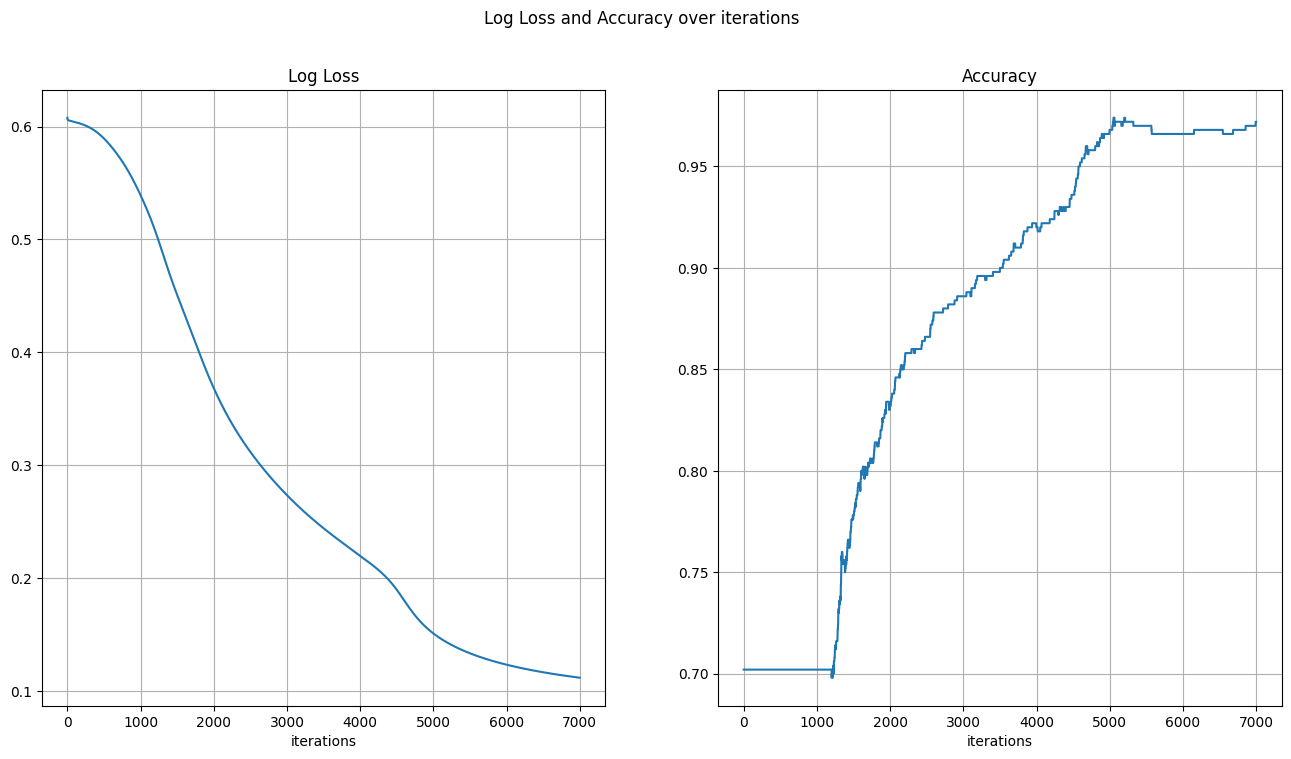

In [ ]:
#### Initialize the network parameters

np.random.seed(1241)

W_1 = np.random.uniform(-1,1, size = (3,4))
W_2 = np.random.uniform(-1,1, size = (4))
num_iter = 7000
learning_rate = 0.001
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
  y_pred, (J_W_1_grad, J_W_2_grad) = forward_pass(W_1, W_2)

    ## Update the weight matrices
  W_1 = W_1 - learning_rate * J_W_1_grad
  W_2 = W_2 - learning_rate * J_W_2_grad

    ### Compute the loss and accuracy
  # LOSS
  loss = loss_fn(y, y_pred)
  loss_vals.append(loss)

  # ACCURACY
  true_predict = np.sum((y_pred >= 0.5) == y)
  accuracy = true_predict / num_obs
  accuracies.append(accuracy)
    ## Print the loss and accuracy for every 200th iteration
  if i % 200 == 0:
    print('Iteration {}, Loss = {:.4f}, Accuracy = {:.2f}%'.format(
        i, loss, accuracy * 100
    ))

plot_loss_accuracy(loss_vals, accuracies)

***ANALYSIS:***

Upon examining the provided code, it's evident that we're implementing a neural network using the sigmoid activation function and logarithmic loss function for optimization. The network undergoes forward pass computations and updates its weights through back-propagation iteratively. The observed trend in the printed accuracy and loss metrics indicates successful training, with the accuracy steadily increasing and the loss consistently decreasing over iterations. Consequently, suggesting that the model is effectively minimizing its prediction errors. Therefore, it appears that the accuracy and loss metrics are being appropriately computed in the code.

Plot the predicted answers, with mistakes in yellow

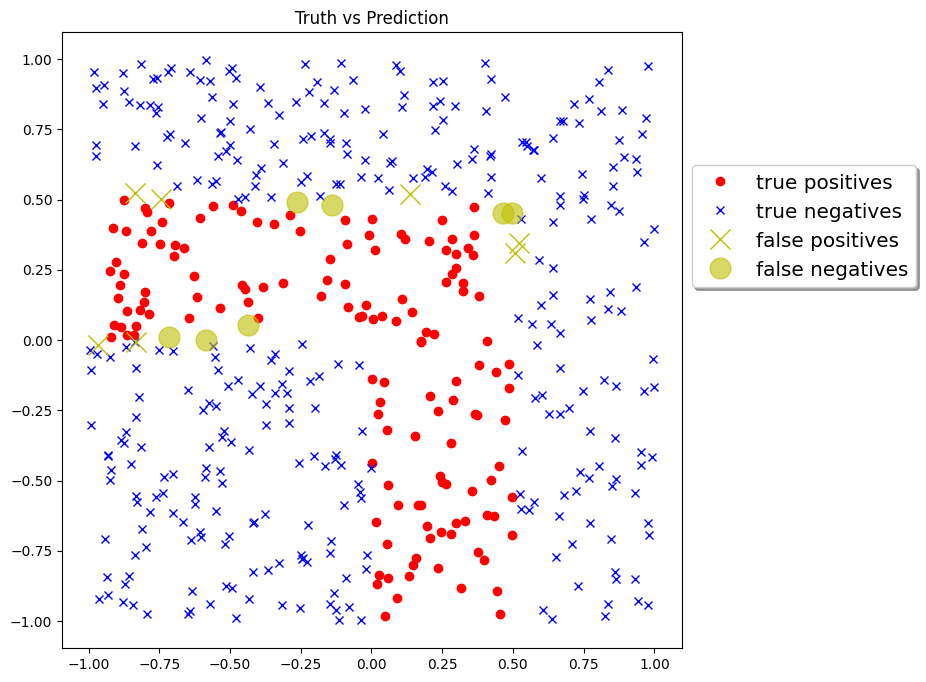

In [ ]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

***ANALYSIS:***

Analyzing the graph above for plotting predicted answers, it effectively visualizes the classification results, distinguishing between true and false predictions. True positives and true negatives are represented by red circles and blue crosses, respectively, while false positives and false negatives are highlighted in yellow, illustrating prediction errors. This visualization aids in understanding the model's performance and areas where it struggles, providing valuable insights for further refinement.

Once your code is running, try it for the different patterns below.

Which patterns was the neural network able to learn quickly and which took longer?
- The neural network managed to grasp the circle pattern and centered square effectively due to their simple shape, where data naturally clusters to form circle-like structures. However, understanding the diamond-shaped, thick, and thin right angle patterns demands more intricate computations and functions, making it challenging for the model to learn. Consequently, as the sample data increases, the complexity of operations might prolong the processing time.


What learning rates and numbers of iterations worked well?
- Based on the procedure, I tested that optimal learning rates should be 0.001, paired with 1000 iterations or more for the neural network to perform effectively, These settings yield satisfactory outcomes, with the model accurately predicting values and demonstrating strong performance, as evidenced by the generated graphs. Overall, increasing the number of iterations allows the model more opportunities to learn from the data and adjust its weights accordingly.

#### Supplementary Activity

1. Use a different weights , input and activation function
2. Apply feedforward and backpropagation
3. Plot the loss and accuracy for every 300th iteration


In [ ]:
# activation function
# ReLu
# Tanh
# Softmax

### ReLu

In [ ]:
# ReLu

def relu(x):
    """
    ReLu function
    """
    return np.maximum(0, x)

def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)

    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')

    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

Iteration 0, Loss = 1.1181, Accuracy = 0.30%
Iteration 300, Loss = 0.5712, Accuracy = 0.70%
Iteration 600, Loss = 0.5061, Accuracy = 0.69%
Iteration 900, Loss = 0.4787, Accuracy = 0.71%


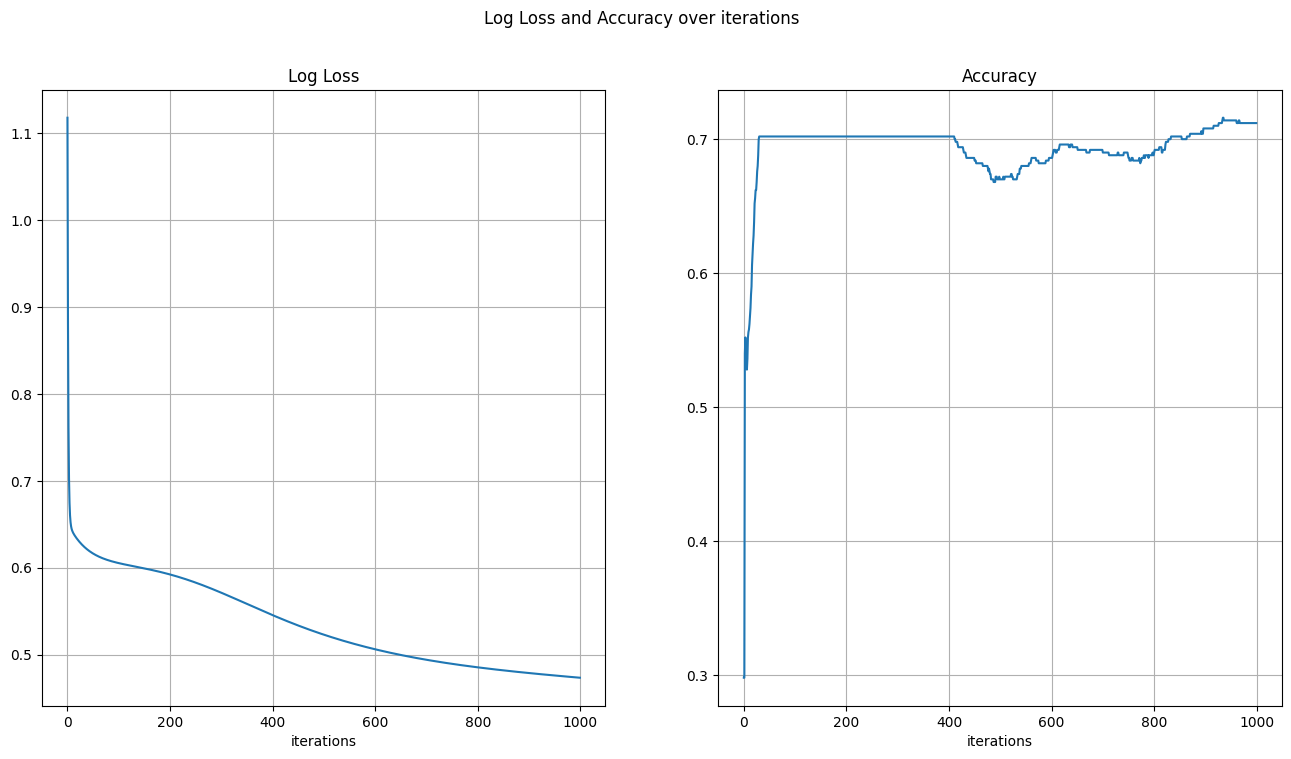

In [ ]:
np.random.seed(1241)

W_1 = np.random.uniform(-1,4, size = (3,4))
W_2 = np.random.uniform(-1,4, size = (4))
num_iter = 1000
learning_rate = 0.001



loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
  y_pred, (J_W_1_grad, J_W_2_grad) = forward_pass(W_1, W_2)

    ## Update the weight matrices
  W_1 = W_1 - learning_rate * J_W_1_grad
  W_2 = W_2 - learning_rate * J_W_2_grad

    ### Compute the loss and accuracy
  # LOSS
  loss = loss_fn(y, y_pred)
  loss_vals.append(loss)

  # ACCURACY
  true_predict = np.sum((y_pred >= 0.5) == y)
  accuracy = true_predict / num_obs
  accuracies.append(accuracy)
    ## Print the loss and accuracy for every 300th iteration
  if i % 300 == 0:
    print('Iteration {}, Loss = {:.4f}, Accuracy = {:.2f}%'.format(
        i, loss, accuracy
    ))

plot_loss_accuracy(loss_vals, accuracies)

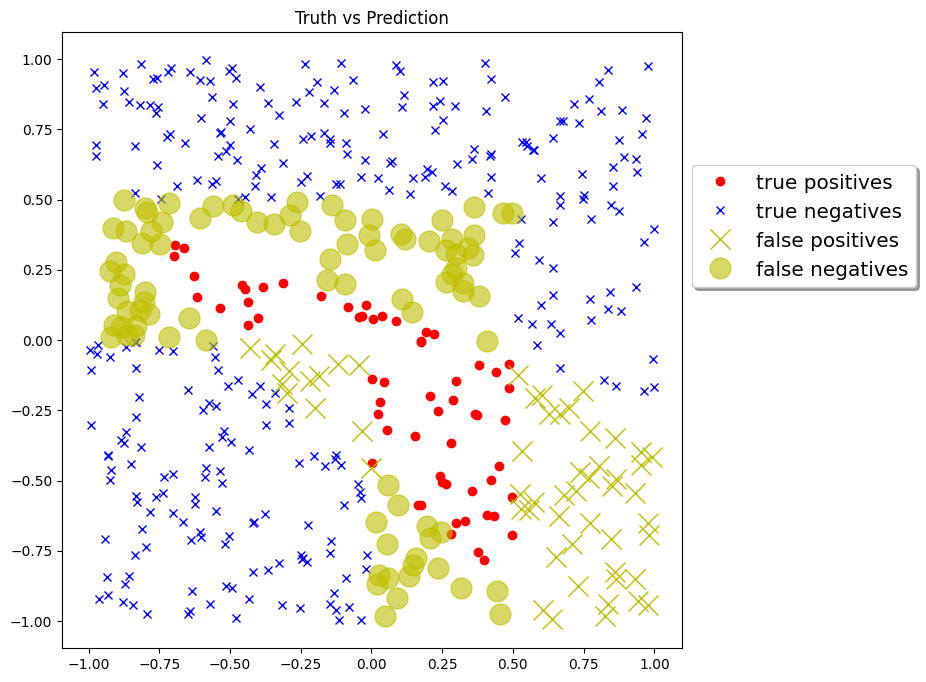

In [ ]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

***ANALYSIS:***

In the ReLU activation function, the loss decreases gradually over iterations, indicating a better fit of the model to the data. However, the accuracy remains low, indicating that the model's predictions are not significantly better than random guessing. Despite the improvement in loss, the low accuracy suggests that further adjustments to the model or training process may be necessary to achieve better performance.

### Tanh

In [ ]:
# Tanh

def tanh(x):
    """
    tanh function
    """
    return np.tanh(x)


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)

    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')

    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

Iteration 0, Loss = 1.0126, Accuracy = 0.54%
Iteration 300, Loss = 0.2954, Accuracy = 0.88%
Iteration 600, Loss = 0.2088, Accuracy = 0.93%
Iteration 900, Loss = 0.2044, Accuracy = 0.92%
Iteration 1200, Loss = 0.1864, Accuracy = 0.93%
Iteration 1500, Loss = 0.1751, Accuracy = 0.94%
Iteration 1800, Loss = 0.1669, Accuracy = 0.94%


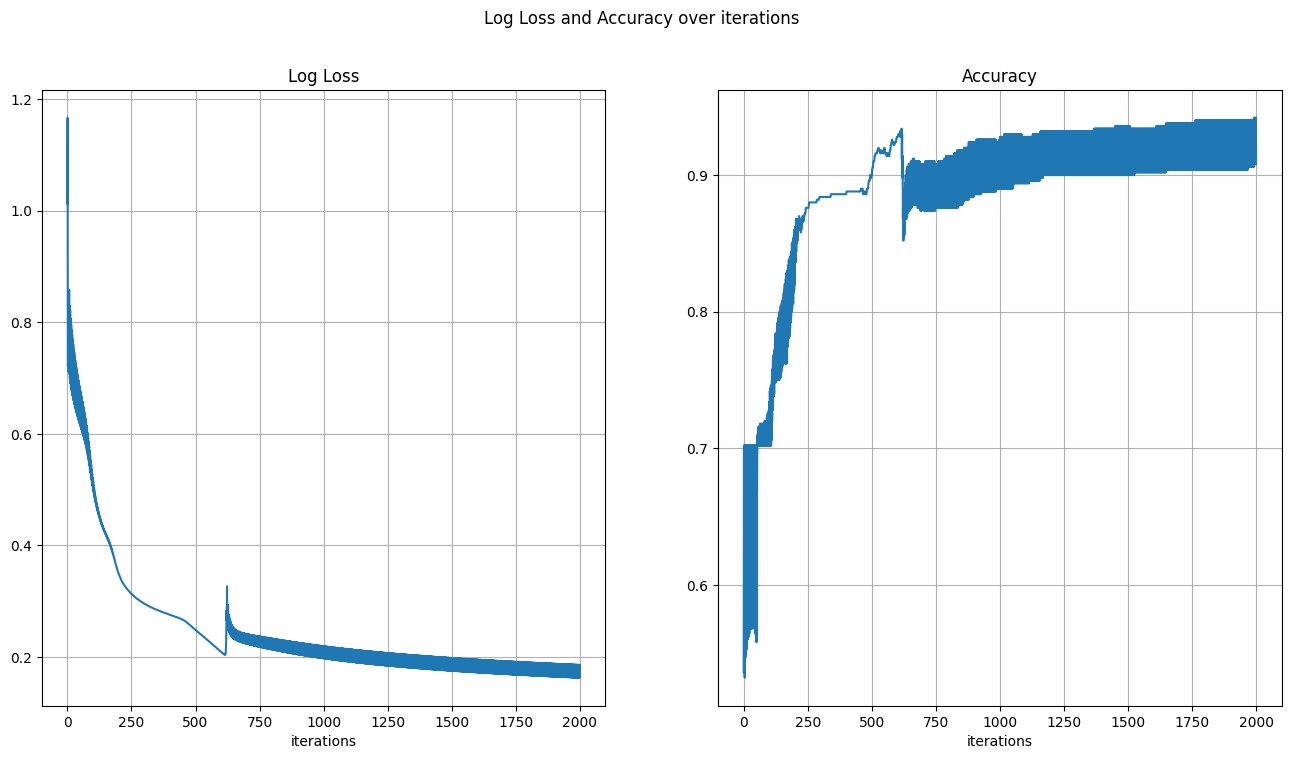

In [ ]:
np.random.seed(1241)

W_1 = np.random.uniform(-2,6, size = (3,4))
W_2 = np.random.uniform(-2,6, size = (4))
num_iter = 2000
learning_rate = 0.01
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
  y_pred, (J_W_1_grad, J_W_2_grad) = forward_pass(W_1, W_2)

    ## Update the weight matrices
  W_1 = W_1 - learning_rate * J_W_1_grad
  W_2 = W_2 - learning_rate * J_W_2_grad

    ### Compute the loss and accuracy
  # LOSS
  loss = loss_fn(y, y_pred)
  loss_vals.append(loss)

  # ACCURACY
  true_predict = np.sum((y_pred >= 0.5) == y)
  accuracy = true_predict / num_obs
  accuracies.append(accuracy)
    ## Print the loss and accuracy for every 300th iteration
  if i % 300 == 0:
    print('Iteration {}, Loss = {:.4f}, Accuracy = {:.2f}%'.format(
        i, loss, accuracy
    ))

plot_loss_accuracy(loss_vals, accuracies)

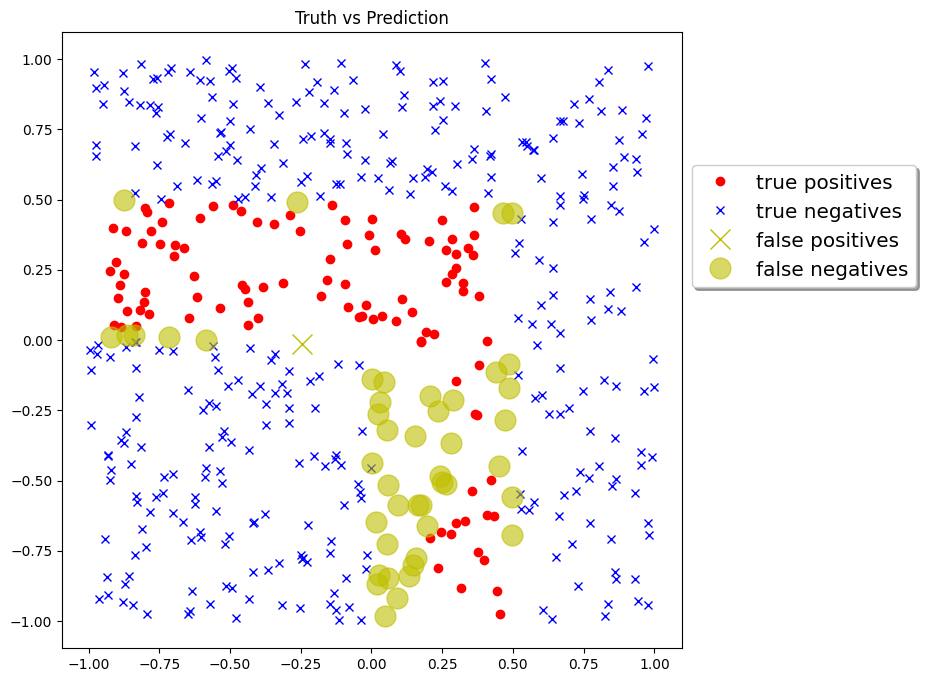

In [ ]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

***ANALYSIS:***

The depicted graph illustrates the neural network's processing and prediction of values according to the applied weights. Utilizing the Tanh activation function, the network's output, along with other parameters, is displayed. The graphs indicate that the model's predictions were inaccurate, suggesting below average performance.

### Softmax

In [ ]:
# softmax

def softmax(x):
    score = np.exp(x - np.max(x))
    """
    softmax function
    """
    return score / np.sum(score)


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)

    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')

    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

Iteration 0, Loss = 1.2926, Accuracy = 0.54%
Iteration 300, Loss = 0.5278, Accuracy = 0.65%
Iteration 600, Loss = 0.4800, Accuracy = 0.72%
Iteration 900, Loss = 0.4504, Accuracy = 0.70%
Iteration 1200, Loss = 0.4388, Accuracy = 0.70%
Iteration 1500, Loss = 0.4324, Accuracy = 0.70%
Iteration 1800, Loss = 0.4280, Accuracy = 0.70%
Iteration 2100, Loss = 0.4247, Accuracy = 0.70%
Iteration 2400, Loss = 0.4221, Accuracy = 0.70%
Iteration 2700, Loss = 0.4199, Accuracy = 0.71%
Iteration 3000, Loss = 0.4181, Accuracy = 0.71%
Iteration 3300, Loss = 0.4166, Accuracy = 0.71%
Iteration 3600, Loss = 0.4152, Accuracy = 0.71%
Iteration 3900, Loss = 0.4140, Accuracy = 0.71%


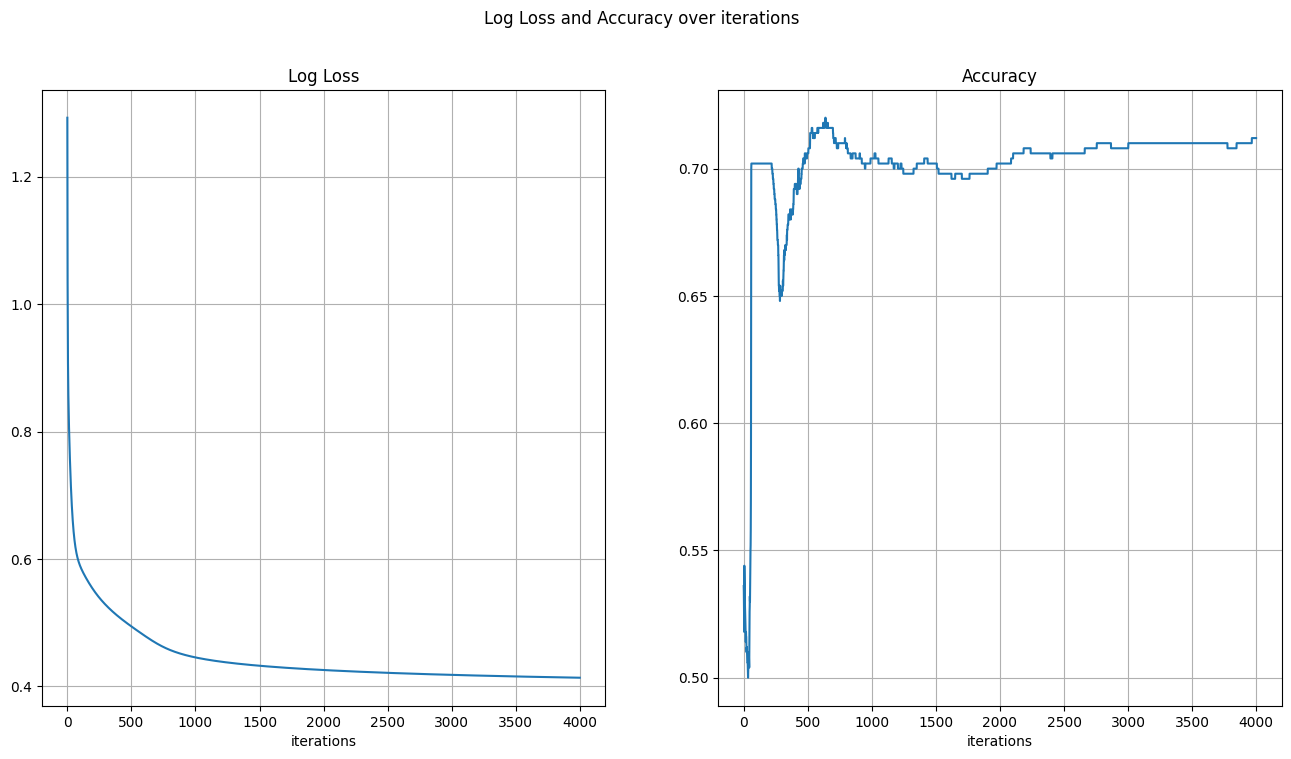

In [ ]:
np.random.seed(1241)

W_1 = np.random.uniform(-3,9, size = (3,4))
W_2 = np.random.uniform(-3,9, size = (4))
num_iter = 4000
learning_rate = 0.001
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
  y_pred, (J_W_1_grad, J_W_2_grad) = forward_pass(W_1, W_2)

    ## Update the weight matrices
  W_1 = W_1 - learning_rate * J_W_1_grad
  W_2 = W_2 - learning_rate * J_W_2_grad

    ### Compute the loss and accuracy
  # LOSS
  loss = loss_fn(y, y_pred)
  loss_vals.append(loss)

  # ACCURACY
  true_predict = np.sum((y_pred >= 0.5) == y)
  accuracy = true_predict / num_obs
  accuracies.append(accuracy)
    ## Print the loss and accuracy for every 200th iteration
  if i % 300 == 0:
    print('Iteration {}, Loss = {:.4f}, Accuracy = {:.2f}%'.format(
        i, loss, accuracy
    ))

plot_loss_accuracy(loss_vals, accuracies)

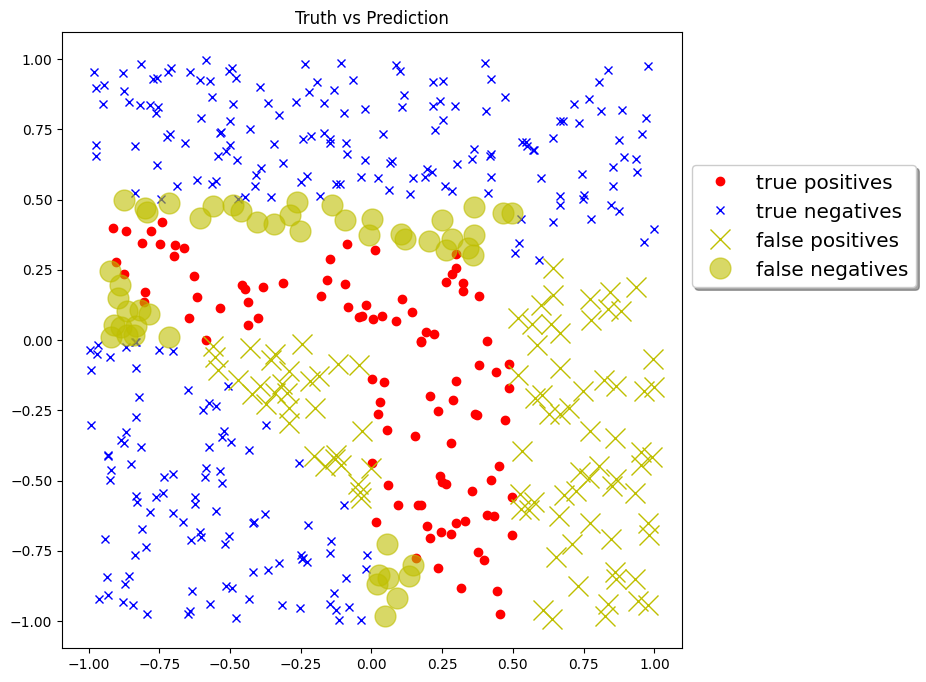

In [ ]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

***ANALYSIS:***

The provided graph illustrates the behavior of the neural network concerning the input data and its predictions. According to the graph, the model demonstrates a trade-off between true positives and false positives during predictions. Despite the presence of true positive values, the model requires further enhancement as it still exhibits noticeable false positive values, indicating incorrect classification or prediction of data.

#CONCLUSION

In this activity, we explored neural networks and their operation. Understanding this concept is crucial for enhancing our skills and delving deeper into the realm of deep learning. Since neural networks are integral to deep learning, comprehending their mechanics and dissecting them is essential for furthering our understanding and honing our modeling skills. The results obtained highlight areas where improvement is needed. We should focus on refining the parameters and functions introduced in this task to enhance model performance and achieve accurate predictions. Despite the complexity introduced by mathematical equations and matrices, I managed to grasp the concepts and analyze the generated graphs. Mastering these concepts will enable me to develop effective models for analyzing and solving various problems.